In [15]:
import numpy as np
from models.clustering.kmeans import Kmeans
from sklearn.model_selection import KFold
from models.metrics.metrics_factory import measure_all, print_result, plot_results, add_result
from sklearn.tree import DecisionTreeClassifier
seed = np.random.seed(4)

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=seed)
df = np.genfromtxt('./kc2.csv', delimiter=',')
x = df[:, :-1]
y = df[:, -1]
k = [1,3,5,7,9]

In [17]:
keuclidean = []
for i in k:
    k_results = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = Kmeans(k=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        k_results.append(measure_all(y_test, y_pred))
    keuclidean.append(add_result('K-means k:{}'.format(i), k_results))

In [18]:
kmahalanobis = []
for i in k:
    k_results = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = Kmeans(k=i, distance="Mahalanobis")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        model.metrics.measure(y_test, y_pred)
        k_results.append(measure_all(y_test, y_pred))
    kmahalanobis.append(add_result('K-means k:{}'.format(i), k_results))

In [19]:
entropy = []
for criterion in ['gini', 'entropy']:
    tree_results = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]


        model = DecisionTreeClassifier(criterion=criterion)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        tree_results.append(measure_all(y_test, y_pred))
    entropy.append(add_result('Tree criterion:{}'.format(criterion), tree_results))

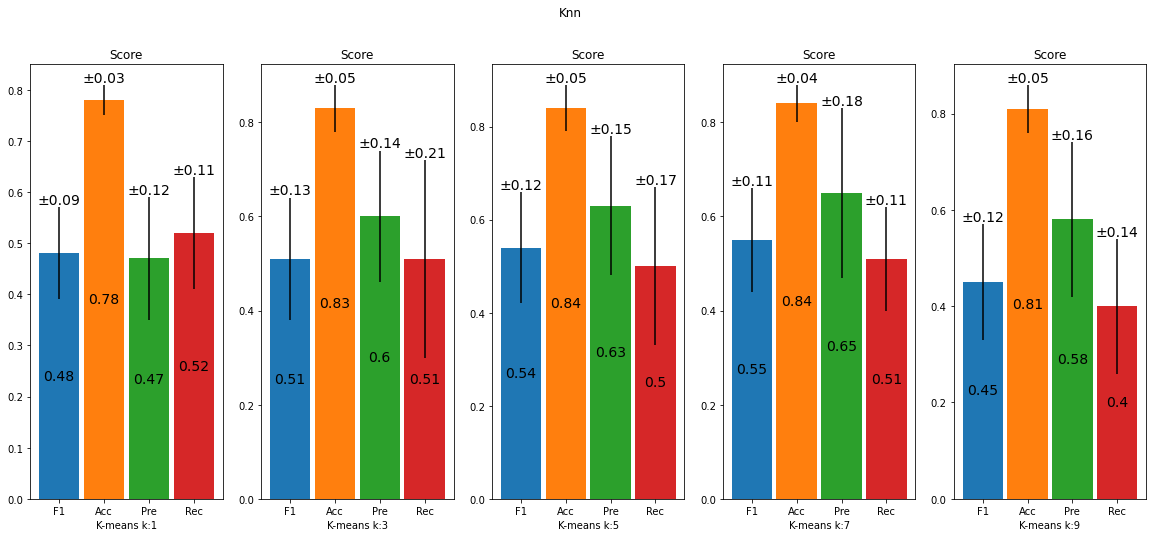

In [20]:
plot_results("Knn", keuclidean)

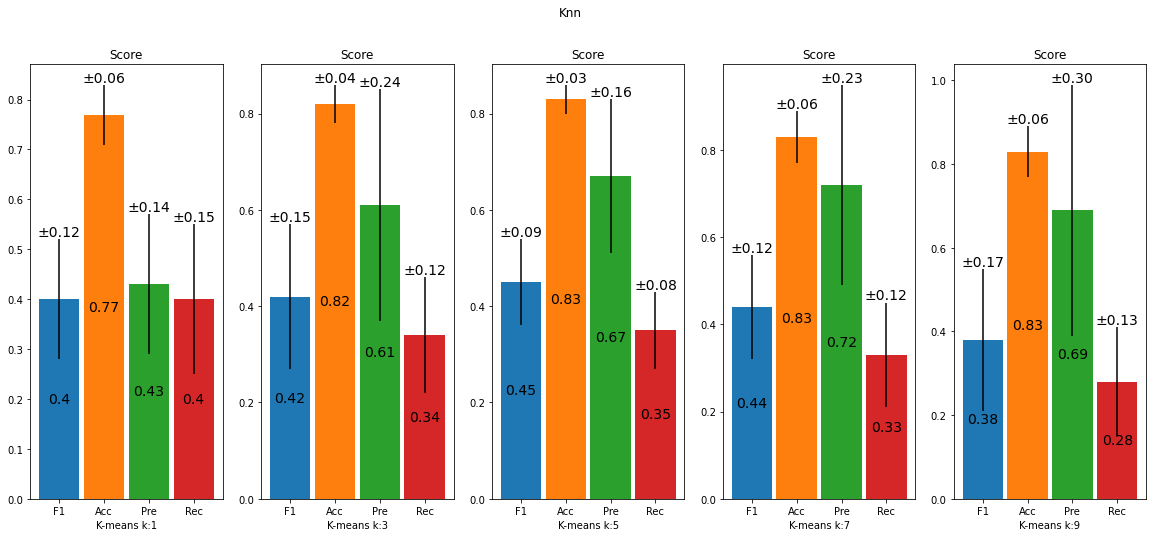

In [21]:
plot_results("Knn", kmahalanobis)

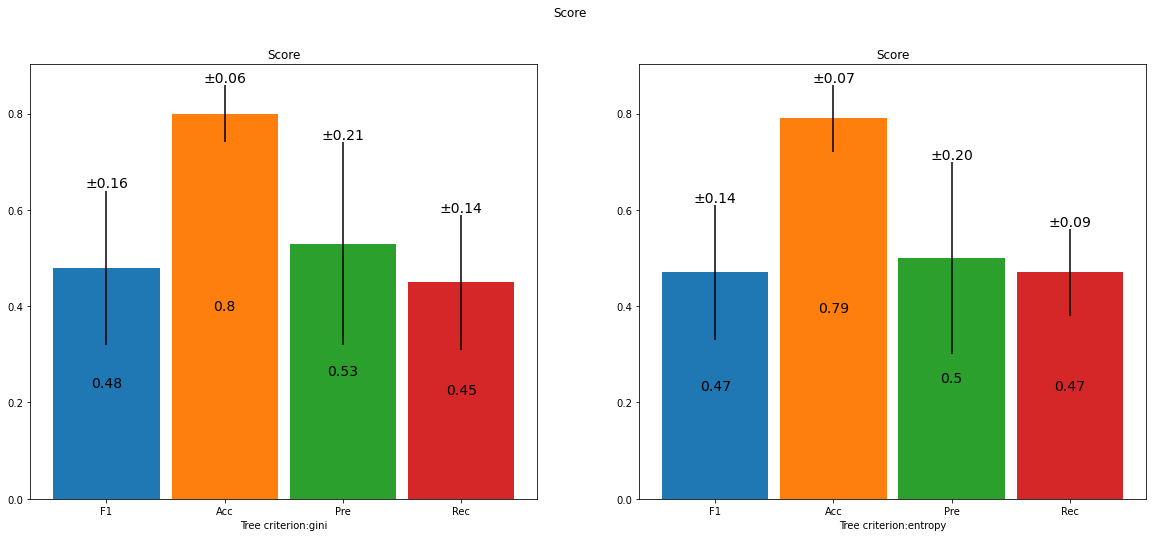

In [22]:
plot_results("Score", entropy)